In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#creating dataframe from dataset (.csv) file and displaying the first 5 rows
path = 'PHQ9 data.csv'
original_df = pd.read_csv(path)
#displaying head of df
original_df.head()

,Unnamed: 0,user_id,phq1,phq2,phq3,phq4,phq5,phq6,phq7,phq8,...,q14,q16,q46,q47,happiness.score,time,period.name,start.time,phq.day,id
0,1,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,...,0.0,NaN,NaN,NaN,2,2017-01-22 20:11:59,evening,2017-01-09 07:22:37,-0.951921,1
1,2,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,...,NaN,NaN,1.0,NaN,3,2017-02-08 22:53:06,evening,2017-01-09 07:22:37,16.159965,1
2,3,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,...,NaN,NaN,NaN,NaN,3,2017-02-08 08:00:46,morning,2017-01-09 07:22:37,15.540289,1
3,4,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,...,NaN,1.0,NaN,NaN,2,2017-01-22 14:01:25,midday,2017-01-09 07:22:37,-1.209259,1
4,5,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,...,1.0,NaN,1.0,NaN,2,2017-01-21 15:37:24,midday,2017-01-09 07:22:37,-2.142604,1


In [3]:
#dropping repeated columns and columns not related to our analysis
dropped_df = original_df.drop(columns=['Unnamed: 0', 'id', 'phq.day', 'start.time', 
                                       'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 
                                       'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q16', 'q46', 'q47'])
#displaying head of df
dropped_df.head()

,user_id,phq1,phq2,phq3,phq4,phq5,phq6,phq7,phq8,phq9,age,sex,happiness.score,time,period.name
0,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,NaN,NaN,2,2017-01-22 20:11:59,evening
1,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,NaN,NaN,3,2017-02-08 22:53:06,evening
2,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,NaN,NaN,3,2017-02-08 08:00:46,morning
3,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,NaN,NaN,2,2017-01-22 14:01:25,midday
4,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,NaN,NaN,2,2017-01-21 15:37:24,midday


In [4]:
#creating empty lists to append information to then add as columns to new df
total_scores = []
depression_severity = []
season = []
#looping through dropped_df
for index, row in dropped_df.iterrows():
    #calculating total score for each row and appending to the total_scores list
    total_score = row['phq1'] + row['phq2'] + row['phq3'] + row['phq4'] + row['phq5'] + row['phq6'] + row['phq7'] + row['phq8'] + row['phq9']
    total_scores.append(total_score)
    
    #determining depression severity based on the total score and appending to the depression_severity list
    if pd.isna(total_score):
        depression_severity.append(np.nan)
    elif total_score <= 4:
        depression_severity.append('minimal')
    elif total_score <= 9:
        depression_severity.append('mild')
    elif total_score <= 14:
        depression_severity.append('moderate')
    elif total_score <= 19:
        depression_severity.append('moderately severe')
    else:
        depression_severity.append('severe')
    
    #finding the season based on the time column in dropped_df and appending the season to the season list
    date = row['time'].split()
    year_month_day = date[0].split('-')
    if year_month_day[1] == '12' or  year_month_day[1] == '01' or year_month_day[1] == '02':
        season.append('winter')
    elif year_month_day[1] == '03' or  year_month_day[1] == '04' or year_month_day[1] == '05':
        season.append('spring')
    elif year_month_day[1] == '06' or  year_month_day[1] == '07' or year_month_day[1] == '08':
        season.append('summer')
    else: 
        season.append('fall')
#creating a new df for the column additions
total_scores_df = dropped_df
#adding a total.score, depression.severity, and season column to total_scores_df
total_scores_df['total.score'] = total_scores
total_scores_df['depression.severity'] = depression_severity
total_scores_df['season'] = season
#reordering columns for readability
total_scores_df = total_scores_df.iloc[:,[0,1,2,3,4,5,6,7,8,9,15,16,10,11,12,13,17,14]]
#displaying head of new df
total_scores_df.head()

,user_id,phq1,phq2,phq3,phq4,phq5,phq6,phq7,phq8,phq9,total.score,depression.severity,age,sex,happiness.score,time,season,period.name
0,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,23.0,severe,NaN,NaN,2,2017-01-22 20:11:59,winter,evening
1,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,23.0,severe,NaN,NaN,3,2017-02-08 22:53:06,winter,evening
2,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,23.0,severe,NaN,NaN,3,2017-02-08 08:00:46,winter,morning
3,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,23.0,severe,NaN,NaN,2,2017-01-22 14:01:25,winter,midday
4,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,23.0,severe,NaN,NaN,2,2017-01-21 15:37:24,winter,midday


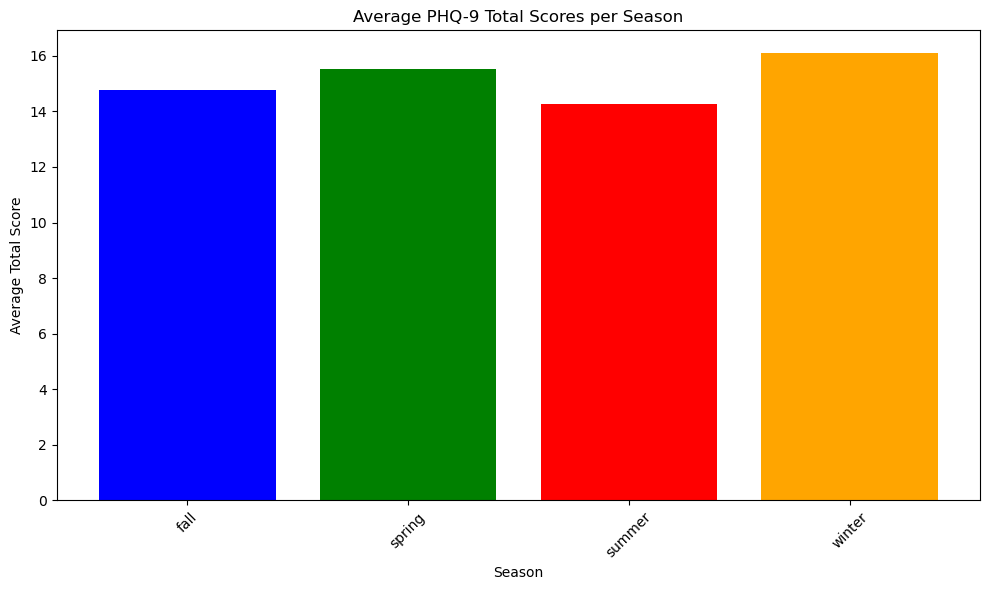

In [5]:
# Group the data by season and calculate the mean of total scores for each season
season_scores = total_scores_df.groupby('season')['total.score'].mean().reset_index()

# Plotting the bar graph
plt.figure(figsize=(10,6))
plt.bar(season_scores['season'], season_scores['total.score'], color=['blue', 'green', 'red', 'orange'])
plt.title('Average PHQ-9 Total Scores per Season')
plt.xlabel('Season')
plt.ylabel('Average Total Score')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to fit the figure neatly

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

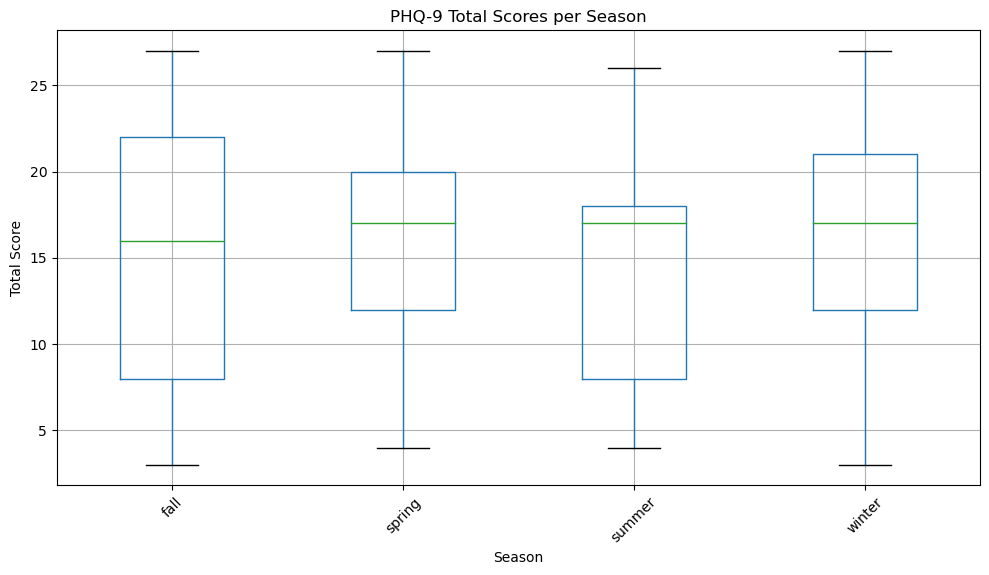

In [6]:
# Plotting the box plot for total scores per season
plt.figure(figsize=(10,6))
total_scores_df.boxplot(column='total.score', by='season', figsize=(10,6))

plt.title('PHQ-9 Total Scores per Season')
plt.suptitle('')  # Suppress the automatic "Boxplot grouped by season" title
plt.xlabel('Season')
plt.ylabel('Total Score')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to fit the figure neatly

# Show the plot
plt.show()

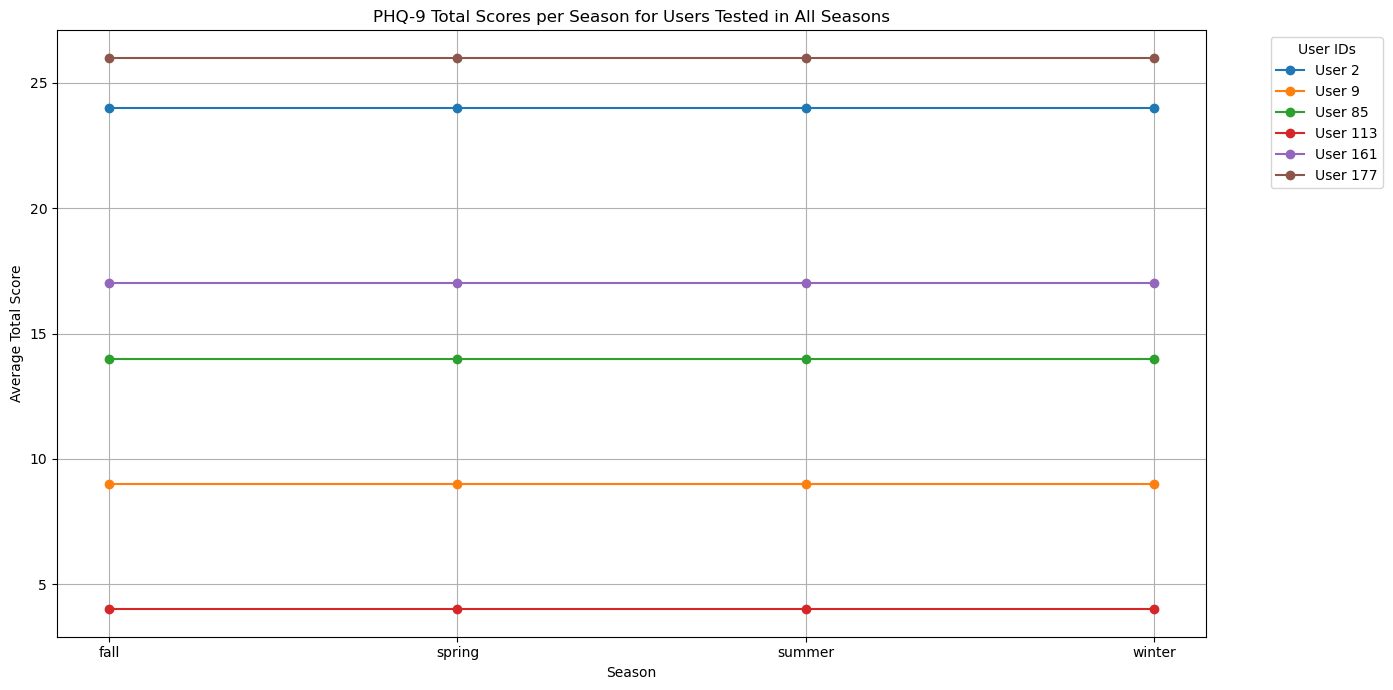

In [7]:
# Filter the DataFrame to include only users who have taken the test in all four seasons
users_all_seasons = total_scores_df.groupby('user_id').filter(lambda x: x['season'].nunique() == 4)

# Group the data by user_id and season and calculate the mean total score for each group
user_season_scores = users_all_seasons.groupby(['user_id', 'season'])['total.score'].mean().unstack()

# Plotting the line graph
plt.figure(figsize=(14, 7))

# Plotting a line for each user
for user_id in user_season_scores.index:
    plt.plot(user_season_scores.columns, user_season_scores.loc[user_id], marker='o', label=f'User {user_id}')

plt.title('PHQ-9 Total Scores per Season for Users Tested in All Seasons')
plt.xlabel('Season')
plt.ylabel('Average Total Score')
plt.legend(title='User IDs', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place the legend outside of the plot
plt.grid(True)
plt.tight_layout()  # Adjust the layout to fit the figure neatly

# Show the plot
plt.show()

In [5]:
#statistics grouped by season then user
agg_df = total_scores_df.groupby(['season', 'user_id'])[['total.score']].agg(['mean', 'median', 'var', 'std', 'sem']).reset_index().rename(columns={0:'n'})
agg_df.head()

season user_id total.score                      
                        mean median  var  std  sem
0   fall       2        24.0   24.0  0.0  0.0  0.0
1   fall       4        17.0   17.0  0.0  0.0  0.0
2   fall       6        18.0   18.0  0.0  0.0  0.0
3   fall       7        23.0   23.0  0.0  0.0  0.0
4   fall       9         9.0    9.0  0.0  0.0  0.0

In [6]:
#testing access to the agg_df
agg_df.loc[agg_df['season'] == 'fall']['total.score']['mean']

0     24.0
1     17.0
2     18.0
3     23.0
4      9.0
5      NaN
6     19.0
7     21.0
8     25.0
9      3.0
10    22.0
11    27.0
12     6.0
13    14.0
14    23.0
15    11.0
16     4.0
17    24.0
18     5.0
19    19.0
20     NaN
21    11.0
22    17.0
23    16.0
24    26.0
25     8.0
Name: mean, dtype: float64

<BarContainer object of 26 artists>

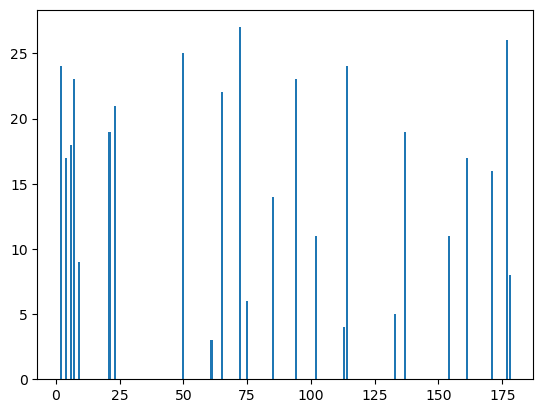

In [202]:
#not the best way to graph but to show how to access the agg_df
plt.bar(agg_df.loc[agg_df['season'] == 'fall']['user_id'], agg_df.loc[agg_df['season'] == 'fall']['total.score']['mean'])

In [203]:
#Do individuals have higher PHQ-9 scores, indicating more severe depressive symptoms, 
#during the winter months compared to the summer months?

In [204]:
#Which questions have higher scores during different seasons?
    #winter: December, January, February
    #spring: March, April, May
    #summer: June, July, August
    #fall: September, October, November

In [205]:
#Does age affect the score?

In [206]:
#Does gender affect the score?